# Poređenje linearnog i kernelizovanog SVM-a

U ovom primeru želimo da generisemo skup podataka kružnog oblika i uporedimo primenljivost linearnog i kernelizovanog metoda potpornih vektora. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import svm

Generišemo skup od 1000 tačaka sa koodinatama iz uniformne raspodele [-1, 1]. 

In [3]:
N = 1000
X1 = np.random.uniform(-1, 1, N)
X2 = np.random.uniform(-1, 1, N)
X = np.vstack([X1, X2]).transpose()
X.shape

(1000, 2)

Dalje, pridružimo generisanom skupu obeležja `-1` ili `1` tako da dobijemo neku kružnu zakonitost.   

In [12]:
def f(X1_i, X2_i):
    return 2*(X1_i**2 + X2_i**2 <= 0.5) - 1

In [13]:
y = f(X1, X2)

Prikažimo dobijeni skup.

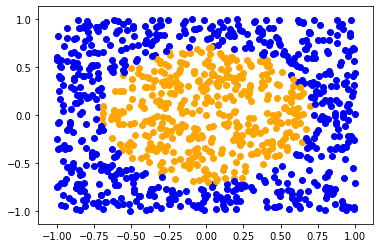

In [14]:
for (X1_i, X2_i) in zip(X1, X2):
    plt.scatter(X1_i, X2_i,
                c = ['blue' if f(X1_i, X2_i) == -1 else 'orange'],
                marker='o')

Slika prikazuje da podaci koje smo generisali nisu linearno separabilni.
Ukoliko koristimo linearni SVM klasifikator (`LinearSVC`) koji nije u stanju da pronađe nelinearne zakonitosti u podacima dobićemo model sa skromnom preciznošću.

Sa druge strane, ukoliko iskoristimo kernelizovani SVM klasifikator (`SVC`), podatke ćemo preslikati u prostor u kojem postaju linearno separabilni pa očekujemo da model bude sa boljim rezultatima.

Delimo podatke na skup za treniranje i skup za testiranje.

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size = 0.66, random_state = 7, stratify = y)

### Linearni SVM klasifikator bez kernela

Podsetimo se da među parametrima linearnog SVM modela navodimo funkciju greške u vidu šarke i regularizacioni parametar kojim se penalizuju instance prisutne u prostoru margine.

In [8]:
linear_svm = svm.LinearSVC(loss='hinge', C=1.0)
linear_svm.fit(X_train, y_train)
linear_svm_acc = metrics.accuracy_score(y_test, linear_svm.predict(X_test))
print("Tacnost linearnog SVM modela: %.2f" % linear_svm_acc)

Tacnost linearnog SVM modela: 0.59


### Kernelizovani SVM klasifikator

Kernelizovani SVM klasifikator se može koristiti kroz `SVC` metodu. Od parametara treba navesti neku od ponuđenih kernel funkcija, njihova podešavanja i regularizacioni parametar.

In [9]:
kernelized_svm = svm.SVC(kernel='rbf', gamma=1, C=1.0)
kernelized_svm.fit(X_train, y_train)
kernelized_svm_acc = metrics.accuracy_score(y_test, kernelized_svm.predict(X_test))
print("Tacnost kernelizovanog SVM modela: %.2f" % kernelized_svm_acc)

Tacnost kernelizovanog SVM modela: 0.99


Kernelizovani SVM klasifikator u procesu učenja zaključuje koje su to instance skupa za treniranje najvažnije za klasifikaciju. Takve instance se zovu potporni vektori.  

In [10]:
print("Broj potpornih vektora: ", kernelized_svm.support_vectors_.shape[0])
print("Broj potpornih vektora po klasama: ", format(kernelized_svm.n_support_))
print("Broj instanci u skupu za treniranje: ", X_train.shape[0])

Broj potpornih vektora:  161
Broj potpornih vektora po klasama:  [81 80]
Broj instanci u skupu za treniranje:  660


Iscrtajmo ponovo podatke uz dodatak pronađenih potpornih vektora.

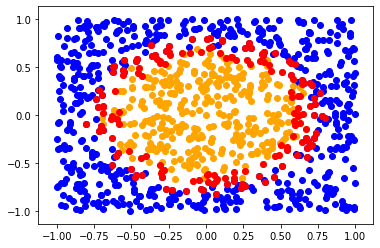

In [11]:
for (X1_i, X2_i) in zip(X1, X2):
    plt.scatter(X1_i, X2_i, c = ['blue' if f(X1_i, X2_i)==-1 else 'orange'])
    
plt.scatter(kernelized_svm.support_vectors_[:, 0], kernelized_svm.support_vectors_[:, 1], c = ['red'])

### Za dalje čitanje:
Interesantan tutorial o SVM-u: https://www.svm-tutorial.com/